# [SARIMAX: Introduction¶](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO


/Users/pengju/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Dataset
friedman2 = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content

In [11]:
endog

time
1959-01-01     310.399994
1959-04-01     316.399994
1959-07-01     321.700012
1959-10-01     323.799988
1960-01-01     327.299988
1960-04-01     333.200012
1960-07-01     333.100006
1960-10-01     335.000000
1961-01-01     335.700012
1961-04-01     340.600006
1961-07-01     343.500000
1961-10-01     350.700012
1962-01-01     355.299988
1962-04-01     361.299988
1962-07-01     365.399994
1962-10-01     371.700012
1963-01-01     375.100006
1963-04-01     379.399994
1963-07-01     386.399994
1963-10-01     391.100006
1964-01-01     400.500000
1964-04-01     408.299988
1964-07-01     417.100006
1964-10-01     419.799988
1965-01-01     430.600006
1965-04-01     437.799988
1965-07-01     447.200012
1965-10-01     461.500000
1966-01-01     472.000000
1966-04-01     477.100006
                 ...     
1974-07-01     950.099976
1974-10-01     957.799988
1975-01-01     982.700012
1975-04-01    1012.400024
1975-07-01    1046.300049
1975-10-01    1075.099976
1976-01-01    1110.199951
1976-04

In [12]:
exog

,const,m2
time,,
1959-01-01,1.0,289.149994
1959-04-01,1.0,294.049988
1959-07-01,1.0,296.730011
1959-10-01,1.0,297.799988
1960-01-01,1.0,299.350006
1960-04-01,1.0,302.329987
1960-07-01,1.0,308.450012
1960-10-01,1.0,312.369995
1961-01-01,1.0,318.290009


                           Statespace Model Results                           
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Fri, 17 Aug 2018   AIC                            496.633
Time:                        17:17:12   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6800     18.494      0.037      0.971     -35.567      36.927
m2             1.0379      0.021     50.327      0.000       0.997       1.078
ar.L1          0.8776      0.059     14.863      0.0

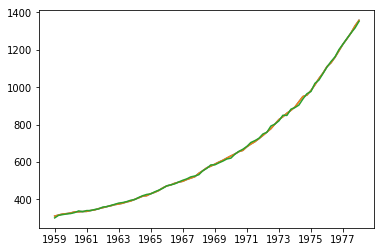

In [14]:
# Dataset
raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw.time
data = raw.loc[:'1981']

# Variables
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_res = mod.fit(disp=False)
print(fit_res.summary())
plt.plot(endog.loc[:'1978-01-01'])
plt.plot(fit_res.fittedvalues)
plt.show()

In [28]:
fit_res.params

const      0.680008
m2         1.037878
ar.L1      0.877585
ma.L1      0.277008
sigma2    31.691935
dtype: float64

In [37]:
endog

time
1959-01-01     310.399994
1959-04-01     316.399994
1959-07-01     321.700012
1959-10-01     323.799988
1960-01-01     327.299988
1960-04-01     333.200012
1960-07-01     333.100006
1960-10-01     335.000000
1961-01-01     335.700012
1961-04-01     340.600006
1961-07-01     343.500000
1961-10-01     350.700012
1962-01-01     355.299988
1962-04-01     361.299988
1962-07-01     365.399994
1962-10-01     371.700012
1963-01-01     375.100006
1963-04-01     379.399994
1963-07-01     386.399994
1963-10-01     391.100006
1964-01-01     400.500000
1964-04-01     408.299988
1964-07-01     417.100006
1964-10-01     419.799988
1965-01-01     430.600006
1965-04-01     437.799988
1965-07-01     447.200012
1965-10-01     461.500000
1966-01-01     472.000000
1966-04-01     477.100006
                 ...     
1974-07-01     950.099976
1974-10-01     957.799988
1975-01-01     982.700012
1975-04-01    1012.400024
1975-07-01    1046.300049
1975-10-01    1075.099976
1976-01-01    1110.199951
1976-04

In [38]:
exog

,const,m2
time,,
1959-01-01,1.0,289.149994
1959-04-01,1.0,294.049988
1959-07-01,1.0,296.730011
1959-10-01,1.0,297.799988
1960-01-01,1.0,299.350006
1960-04-01,1.0,302.329987
1960-07-01,1.0,308.450012
1960-10-01,1.0,312.369995
1961-01-01,1.0,318.290009


In [39]:
mod = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
res = mod.filter(fit_res.params)

In [30]:
res.params

const      0.680008
m2         1.037878
ar.L1      0.877585
ma.L1      0.277008
sigma2    31.691935
dtype: float64

In [31]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [32]:
predict_ci

,lower consump,upper consump
1959-01-01,272.009981,329.554679
1959-04-01,303.310950,326.089121
1959-07-01,307.274516,329.393930
1959-10-01,311.105194,333.176632
1960-01-01,313.115536,335.183307
1960-04-01,318.281580,340.349069
1960-07-01,327.300338,349.367806
1960-10-01,323.180790,345.248256
1961-01-01,329.089488,351.156954
1961-04-01,329.096123,351.163589


In [33]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic='1978-01-01')
predict_dy_ci = predict_dy.conf_int()

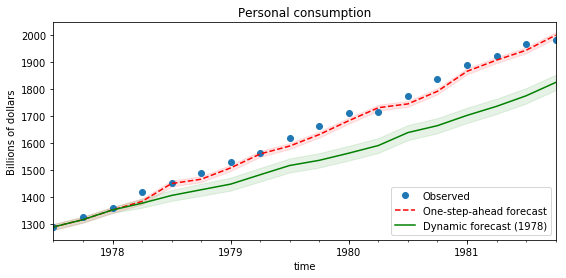

In [34]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-07-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')
plt.show()

In [8]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.loc['1977-10-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['1977-10-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['1977-10-01':].copy()
ci.iloc[:,0] -= endog.loc['1977-10-01':]
ci.iloc[:,1] -= endog.loc['1977-10-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

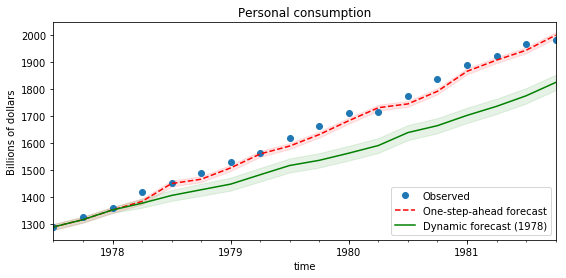

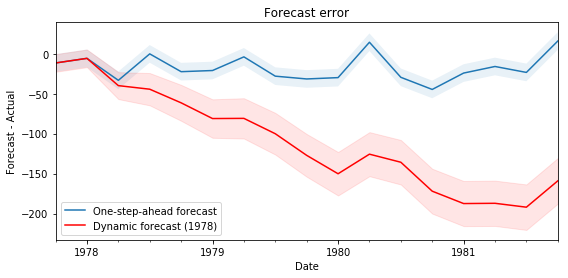

In [9]:
plt.show()